In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame({ 
 'x' : [1.0, 2.0, 3.0, 4.0], 
 'y' : [100, 200, 300, 400] 
 })
df

,x,y
0,1.0,100
1,2.0,200
2,3.0,300
3,4.0,400


In [7]:
def custom_loss(x, y, w, w0, lambda_dict):
    total_loss = 0
    predictions = []
    for xi, yi in zip(x, y):
        # Вычислим скор (здесь просто xi*w)
        score = xi * w
        
        # Предсказание: sign(score - w0)
        # Примем sign(0) = +1 для определённости
        if score - w0 >= 0:
            pred = +1
        else:
            pred = -1
        
        # Если ошибка, то добавляем соответствующий штраф
        if pred != yi:
            total_loss += lambda_dict[yi]
        predictions.append(pred)
    
    return total_loss, predictions


# Данные:
x = [2, 0, 1, 3]
y = [+1, +1, -1, -1]  # истинные метки

# Параметры модели
w = 1      # вес в скор-функции h(x)=w*x
w0 = 1     # порог

# Штрафы за ошибки по классам
lambda_dict = {
    +1: 2,  # штраф, если ошиблись на объекте класса +1
    -1: 1   # штраф, если ошиблись на объекте класса -1
}

loss_value, preds = custom_loss(x, y, w, w0, lambda_dict)

print("Предсказания:", preds)
print("Общая сумма штрафов (loss):", loss_value)


Предсказания: [1, -1, 1, 1]
Общая сумма штрафов (loss): 4


$p(x) \;=\; \frac{1}{\sqrt{2\pi}\,\sigma} \exp\!\Bigl(-\tfrac{(x-\mu)^2}{2\,\sigma^2}\Bigr).$

In [ ]:
from math import exp, pi

def gaussian(x, u, o):
    return 1/((2*pi)**0.5 * o) * exp(-((x-u)**2) / (2*o**2))

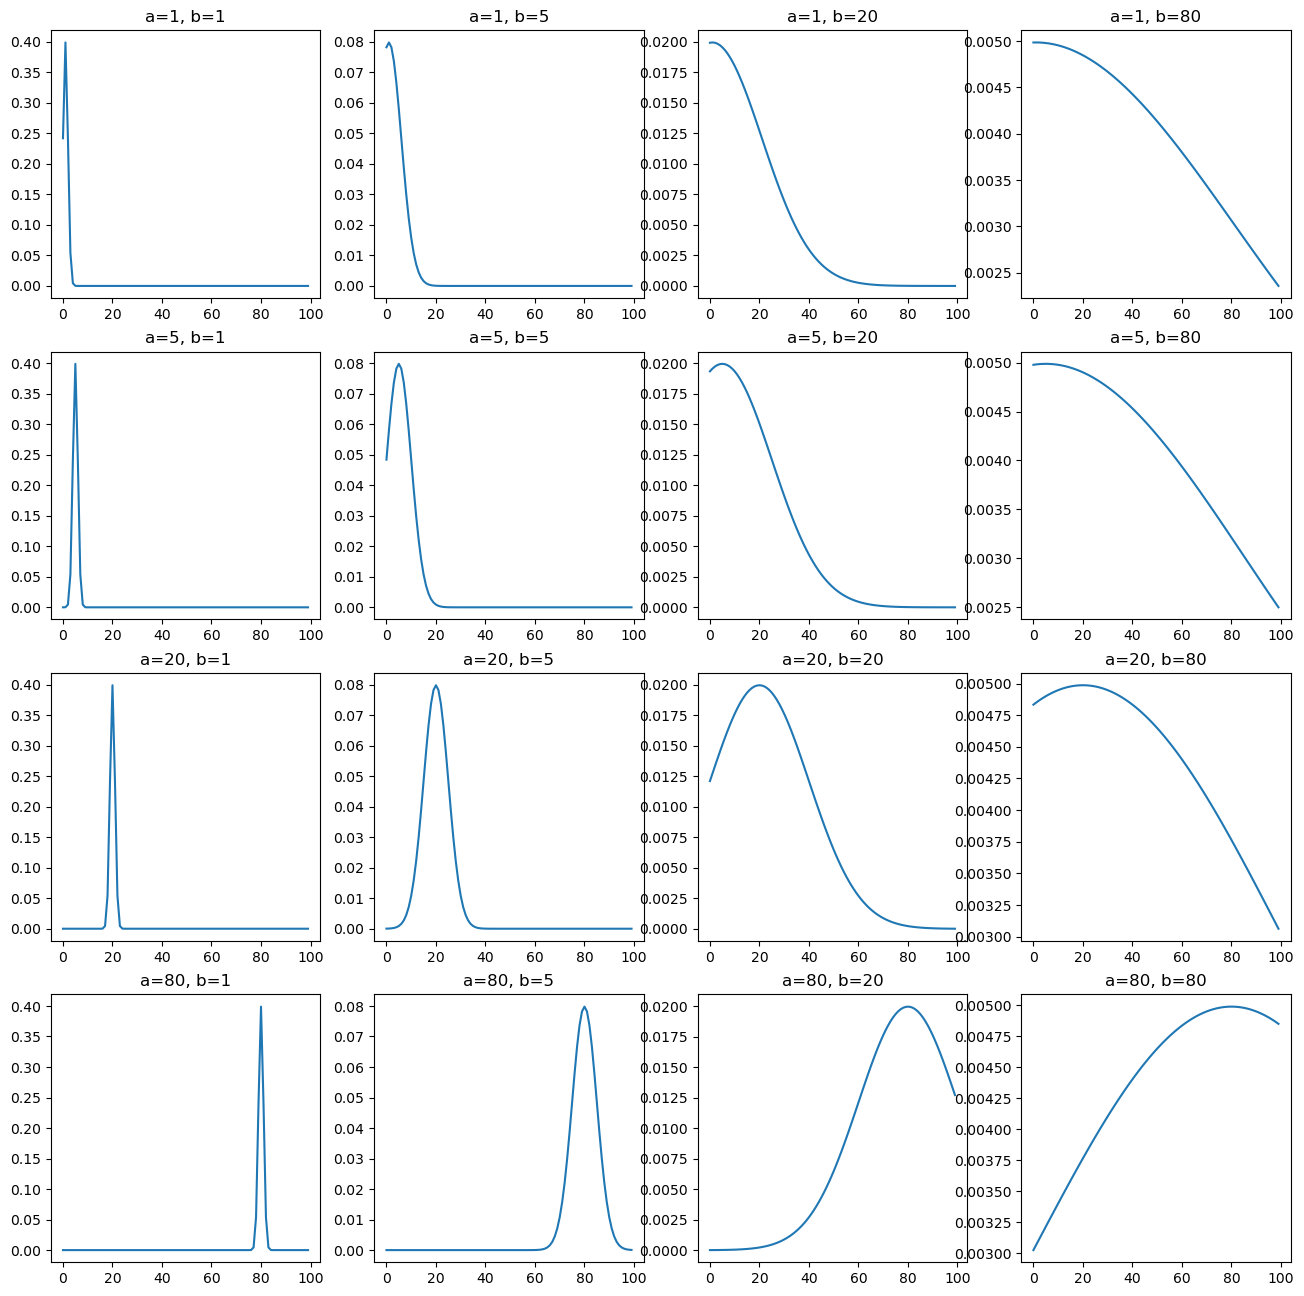

In [37]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i, a in enumerate([1, 5, 20, 80]):
    for j, b in enumerate([1, 5, 20, 80]):
        alpha = [gaussian(x, a, b) for x in range(100)]
        axes[i, j].plot(range(100), alpha)
        axes[i, j].set_title(f"a={a}, b={b}")
plt.show()